In [12]:
import numpy as np
import os
import csv
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\adam\Desktop\Combustioncode-master\DAEM-Modified.xlsx')
s1 = wb['Fetterbush_dead']
t = get_xcel_col(s1, 'A', 11, 57) #57
T_c = get_xcel_col(s1, 'B', 11, 57)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 57)
c = m_e / np.array(s1['D11'].value)
V_e = 1 - c
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    dm_e = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
        dm_e.append(m_e[i]-m_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dm_e = np.array(dm_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    r_em = dm_e / dt1
    return(r_e, r_em)

In [24]:
A1 = 2000
E1 = 60200
Y1 = .33
A2 = 12839
E2 = 75350
Y2 = 0.31

def r_m(A1,E1,Y1,A2,E2,Y2):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i] - t[i-1] 
        
    m[0] = 1
    V[0] = 0
    dm[0] = -((A1*np.exp(-E1/R/T[0]))+(A2*np.exp(-E2/R/T[0])))*m[0]
    dV[0] = ((Y1*A1*np.exp(-E1/R/T[0]))+(Y2*A2*np.exp(-E2/R/T[0])))*m[0]
    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt2[i]
        dm[i] = -((A1*np.exp(-E1/R/T[i]))+(A2*np.exp(-E2/R/T[i])))*m[i]
        dV[i] = ((Y1*A1*np.exp(-E1/R/T[i]))+(Y2*A2*np.exp(-E2/R/T[i])))*m[i]
        V[i] = V[i-1]+dV[i-1]*dt2[i]
    return(m, V, dV, dm)
def f(X):
    A1,E1,Y1,A2,E2,Y2 = X
    e1 = (r_e(V_e, t)[0]*0.10 - r_m(A1,E1,Y1,A2,E2,Y2)[2]*0.10)**2
    e2 = (V_e[1:57] - r_m(A1,E1,Y1,A2,E2,Y2)[1])**2
    return(sum(e1) + sum(e2))

res = minimize(f,(A1,E1,Y1,A2,E2,Y2))
A1,E1,Y1,A2,E2,Y2 = res.x
print(A1)
print(E1)
print(Y1)
print(A2)
print(E2)
print(Y2)

6.413340944329265
61122.368621301626
163.06755761702237
12472.65371417438
76373.23145982708
-1.234039439625231


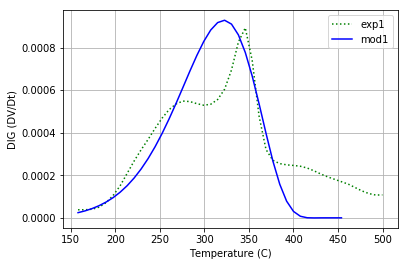

In [25]:
plt.plot(T_c[1:46],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c[1:40],r_m(A1,E1,Y1,A2,E2,Y2)[2][0:39],color = 'blue',label='mod1')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()